In [1]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
from glob import glob
from Functions import *
%run -i "Functions.py"
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

In [2]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
number_of_nodes = len(np.unique(male)) + len(np.unique(female))
"""dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net = nx.from_numpy_array(adj)"""

'dim = max(female.max(), male.max())+1\nadj = np.zeros((dim,dim))\nfor i,j in zip(female,male):\n    adj[i,j] = 1\n    adj[j,i] = 1\nnet = nx.from_numpy_array(adj)'

In [3]:
"""# %% disease parameters
n = np.array([1, 3, 6, 9])
params = np.array([n*1e-04, n*1e-03, n*0.01, n*0.1]).flatten()
tmax = 10000 # days
aggregation = 30 # days
rho = 1
t_initial_seed = 20
p_infected = 1e-03
excl_fraction = 5/7

net_list, agg = temporal_network_list(female, male, time, aggregation)"""

'# %% disease parameters\nn = np.array([1, 3, 6, 9])\nparams = np.array([n*1e-04, n*1e-03, n*0.01, n*0.1]).flatten()\ntmax = 10000 # days\naggregation = 30 # days\nrho = 1\nt_initial_seed = 20\np_infected = 1e-03\nexcl_fraction = 5/7\n\nnet_list, agg = temporal_network_list(female, male, time, aggregation)'

In [4]:
"""s,i,r,t = SIR_temporal(net_list, aggregation, tmax, beta=0.9, mu=0.03, p_infected=p_infected, rho=rho, t_initial_seed=t_initial_seed, exclude_fraction=excl_fraction)"""

's,i,r,t = SIR_temporal(net_list, aggregation, tmax, beta=0.9, mu=0.03, p_infected=p_infected, rho=rho, t_initial_seed=t_initial_seed, exclude_fraction=excl_fraction)'

##### Simulations/SIR_temporal_16482.npz #####


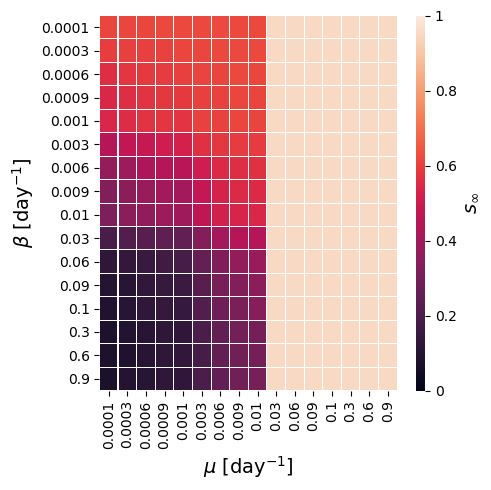

##### Simulations/SIR_temporal_42526_prem0001.npz #####


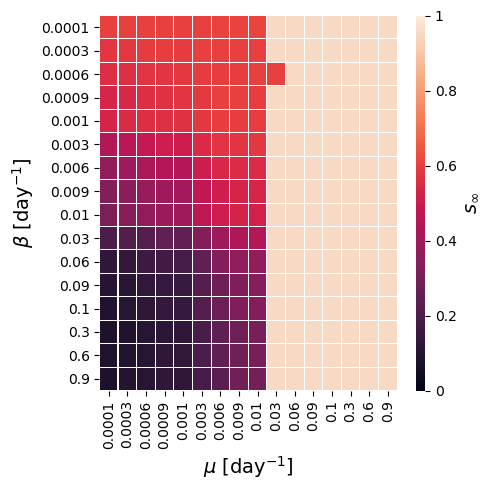

##### Simulations/SIR_temporal_44074_prem001.npz #####


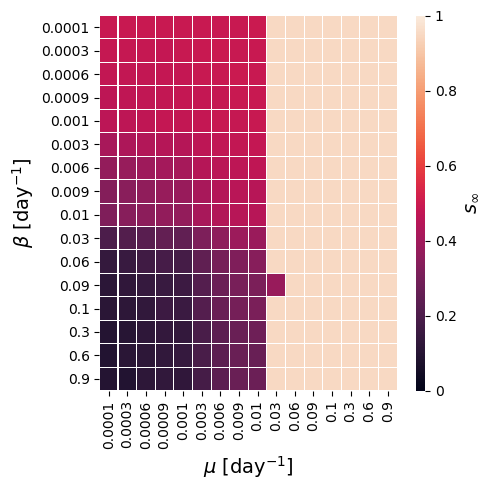

##### Simulations/SIR_temporal_52325_prem1.npz #####


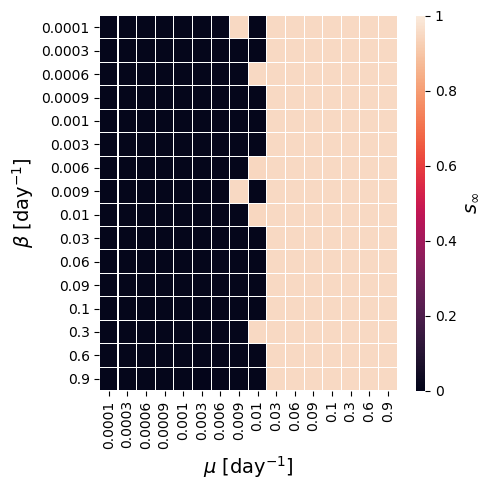

##### Simulations/SIR_temporal_53706_rm5.npz #####


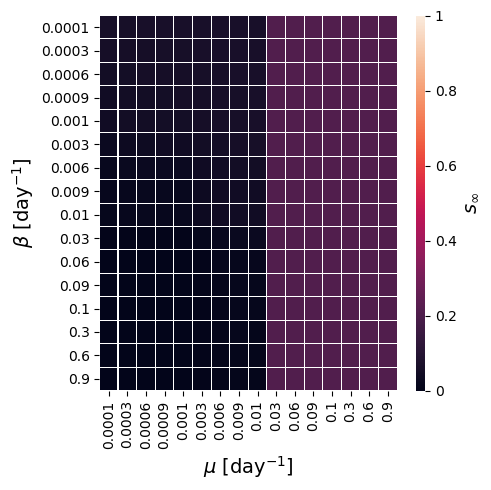

##### Simulations/SIR_temporal_99996_prem01.npz #####


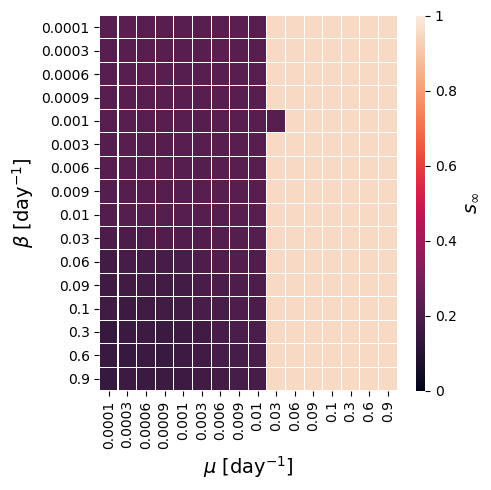

##### Simulations/SIR_temporal_RRM_nodes_23154_rm5.npz #####


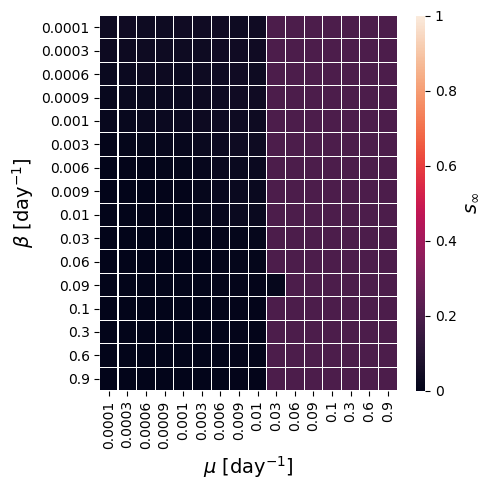

##### Simulations/SIR_temporal_RRM_nodes_96848.npz #####


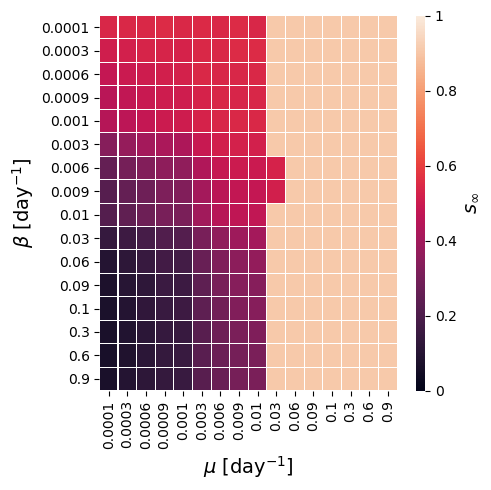

##### Simulations/SIR_temporal_RRM_time_19836.npz #####


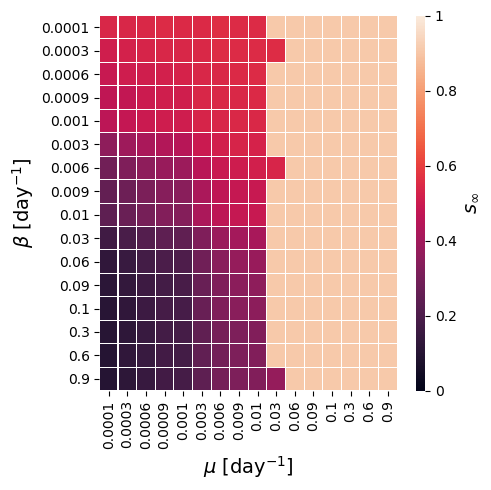

##### Simulations/SIR_temporal_RRM_time_62896_rm5.npz #####


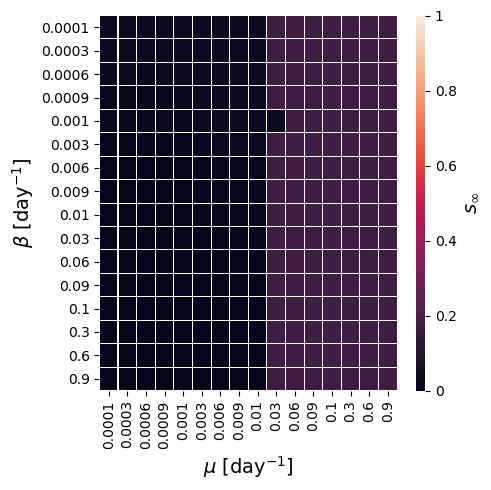

In [5]:
for fname in glob("Simulations/SIR*.npz"):
    data = np.load(fname, allow_pickle=True)
    beta = data["beta"]
    mu   = data["mu"]
    time = data["time"] 
    S    = data["S"] 
    I    = data["I"] 
    R    = data["R"]
    print("##### {} #####".format(fname))
    beta_mu_heatmap(beta, mu, S, number_of_nodes)
    data.close()

##### Simulations/SIS_temporal_30330_rm5.npz #####


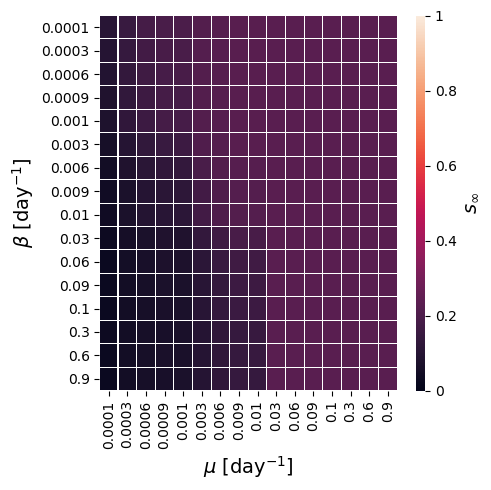

##### Simulations/SIS_temporal_37993_prem001.npz #####


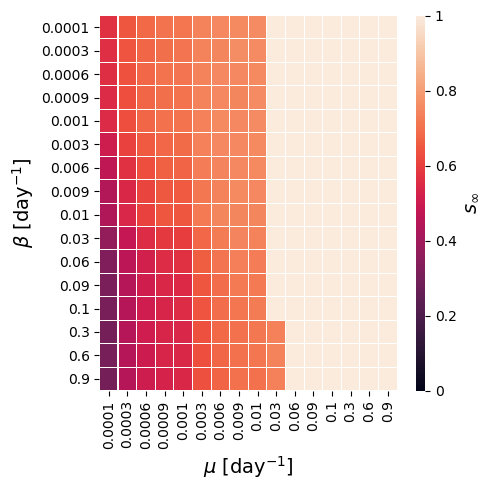

##### Simulations/SIS_temporal_72633.npz #####


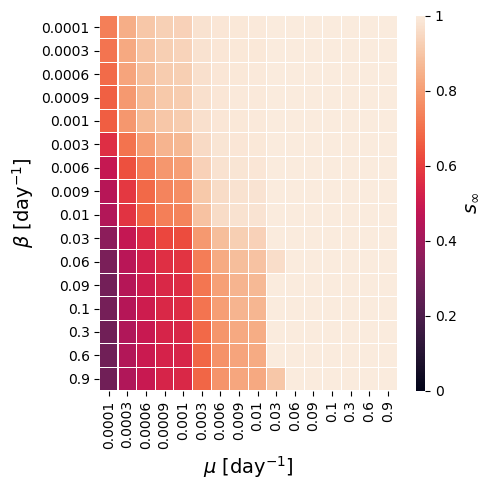

##### Simulations/SIS_temporal_79553_prem01.npz #####


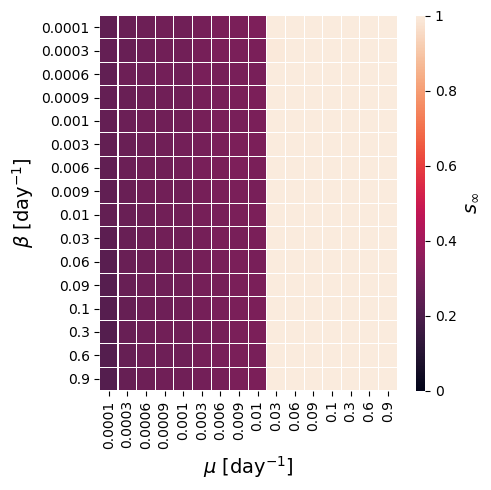

##### Simulations/SIS_temporal_90778_prem1.npz #####


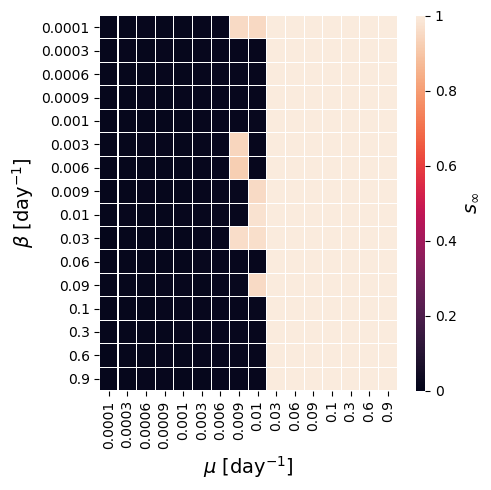

##### Simulations/SIS_temporal_92043_prem0001.npz #####


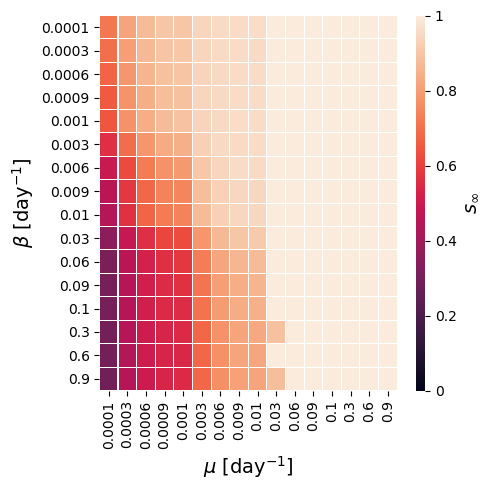

##### Simulations/SIS_temporal_RRM_nodes_26593.npz #####


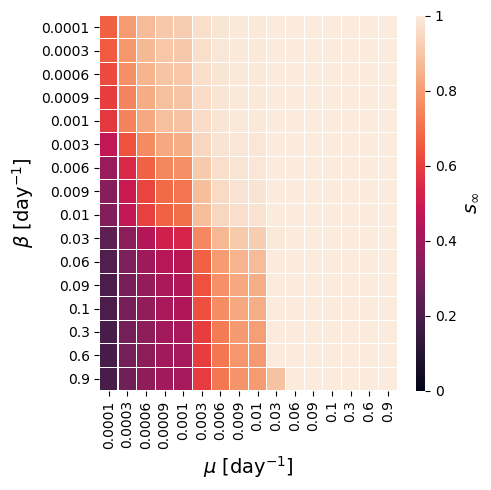

##### Simulations/SIS_temporal_RRM_nodes_95621_rm5.npz #####


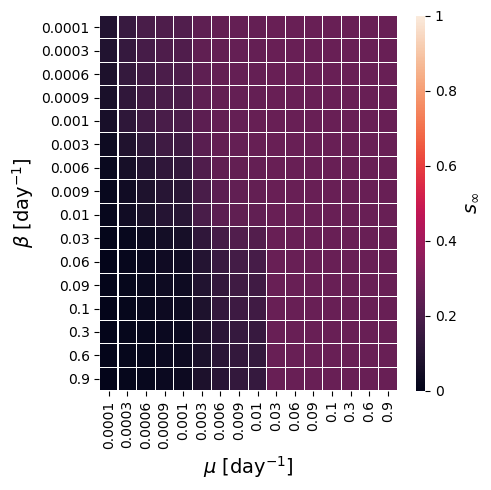

##### Simulations/SIS_temporal_RRM_time_65839.npz #####


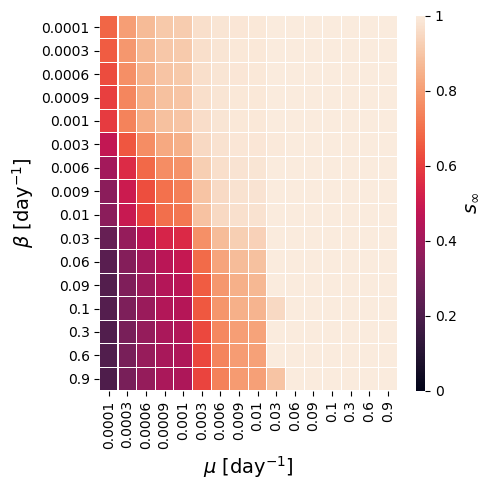

##### Simulations/SIS_temporal_RRM_time_75686_rm5.npz #####


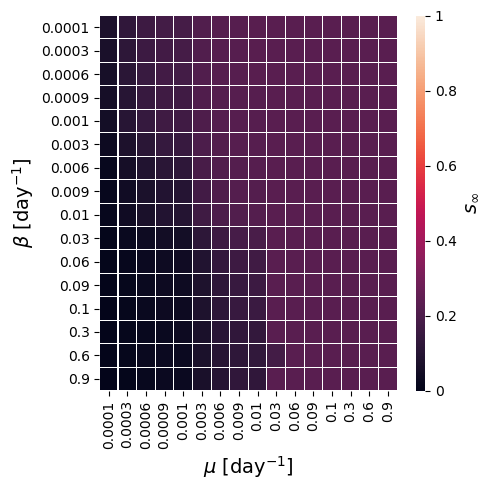

In [6]:
for fname in glob("Simulations/SIS*"):
    data = np.load(fname, allow_pickle=True)
    beta = data["beta"]
    mu   = data["mu"]
    time = data["time"] 
    S    = data["S"] 
    I    = data["I"] 
    print("##### {} #####".format(fname))
    beta_mu_heatmap(beta, mu, S, number_of_nodes)
    data.close()

##### Simulations/SIR_temporal_16482.npz #####


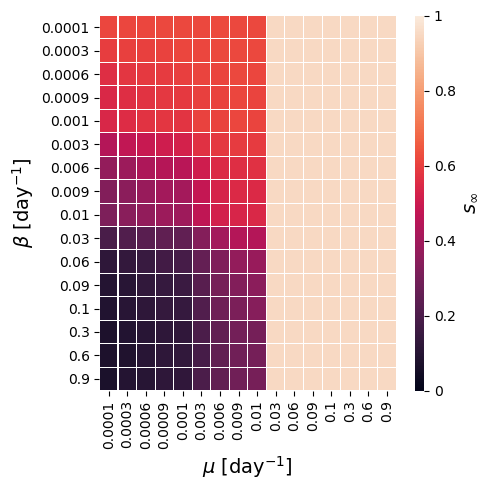

In [7]:
fname = glob("Simulations/SIR_temporal_?????.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_SIR = data["beta"]
mu_SIR   = data["mu"]
time_SIR = data["time"] 
S_SIR    = data["S"] 
I_SIR    = data["I"] 
R_SIR    = data["R"]
name = fname.split("/")[-1]
outname = "Figure/Sim_temporal/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIR, mu_SIR, S_SIR, number_of_nodes, fname=outname)
data.close()

##### Simulations/SIR_temporal_RRM_nodes_96848.npz #####


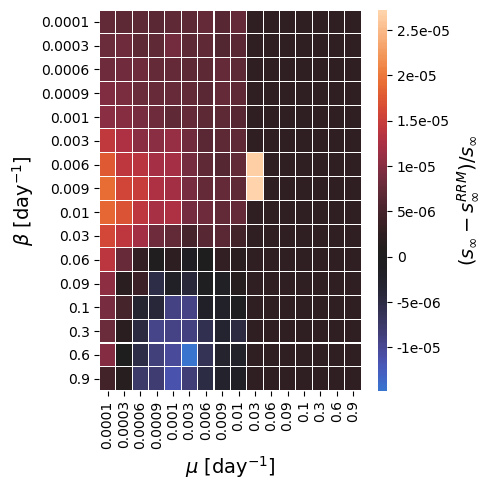

##### Simulations/SIR_temporal_RRM_time_19836.npz #####


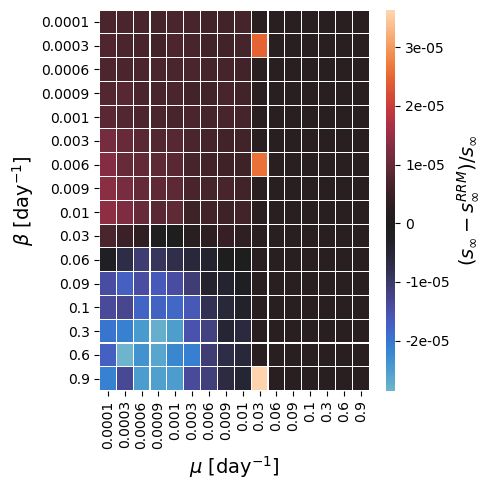

In [9]:
files = glob("Simulations/SIR*_nodes_?????.npz") + glob("Simulations/SIR*_time_?????.npz")
for fname in files:
    data = np.load(fname, allow_pickle=True)
    beta = data["beta"]
    mu   = data["mu"]
    time = data["time"] 
    S    = data["S"] 
    I    = data["I"] 
    R    = data["R"]
    S_diff = [[(el_sir[-1] - el_rrm[-1])/el_sir[-1]] for el_sir, el_rrm in zip(S_SIR, S)]
    name = fname.split("/")[-1]
    outname = "Figure/Sim_temporal/{}_diff.pdf".format(name.split(".")[0])
    print("##### {} #####".format(fname))
    beta_mu_heatmap(beta, mu, S_diff, number_of_nodes, fname=outname)
    data.close()

##### Simulations/SIS_temporal_72633.npz #####


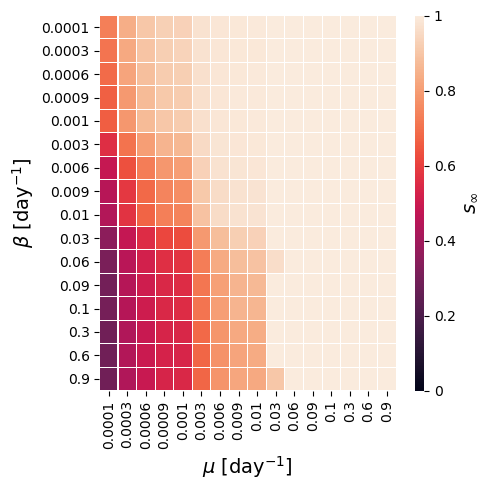

In [10]:
fname = glob("Simulations/SIS_temporal_?????.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_SIS = data["beta"]
mu_SIS   = data["mu"]
time_SIS = data["time"] 
S_SIS    = data["S"] 
I_SIS    = data["I"] 
name = fname.split("/")[-1]
outname = "Figure/Sim_temporal/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIS, mu_SIS, S_SIS, number_of_nodes, fname=outname)
data.close()

##### Simulations/SIS_temporal_RRM_nodes_26593.npz #####


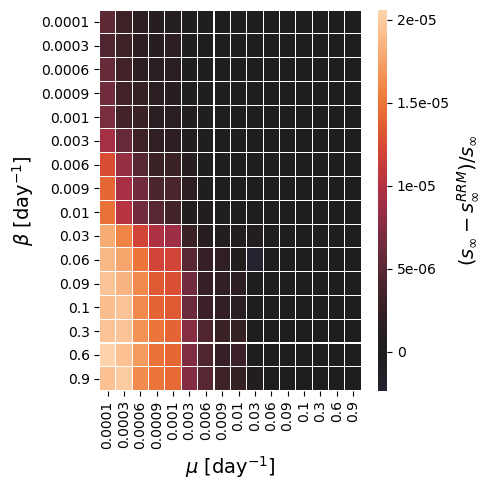

##### Simulations/SIS_temporal_RRM_time_65839.npz #####


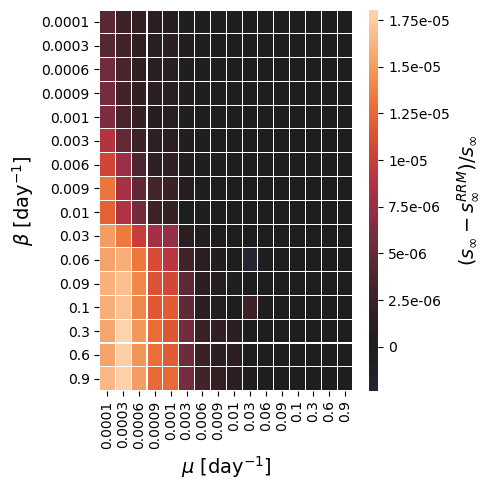

In [11]:
files = glob("Simulations/SIS*_nodes_?????.npz") + glob("Simulations/SIS*_time_?????.npz")
for fname in files:
    data = np.load(fname, allow_pickle=True)
    beta = data["beta"]
    mu   = data["mu"]
    time = data["time"] 
    S    = data["S"] 
    I    = data["I"] 
    S_diff = [[(el_sis[-1] - el_rrm[-1])/el_sis[-1]] for el_sis, el_rrm in zip(S_SIS, S)]
    name = fname.split("/")[-1]
    outname = "Figure/Sim_temporal/{}_diff.pdf".format(name.split(".")[0])
    print("##### {} #####".format(fname))
    beta_mu_heatmap(beta, mu, S_diff, number_of_nodes, fname=outname)
    data.close()